# Gaussian Elimination

In [1]:
# for conversion to PDF use these settings
# %matplotlib inline
# qr_setting = 'url'
# qrviz_setting = 'show'
#
# for lecture use notebook
%matplotlib notebook
qr_setting = 'url'
qrviz_setting = 'save'
#
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
import qrcode
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
reload(sl)
reload(ut);

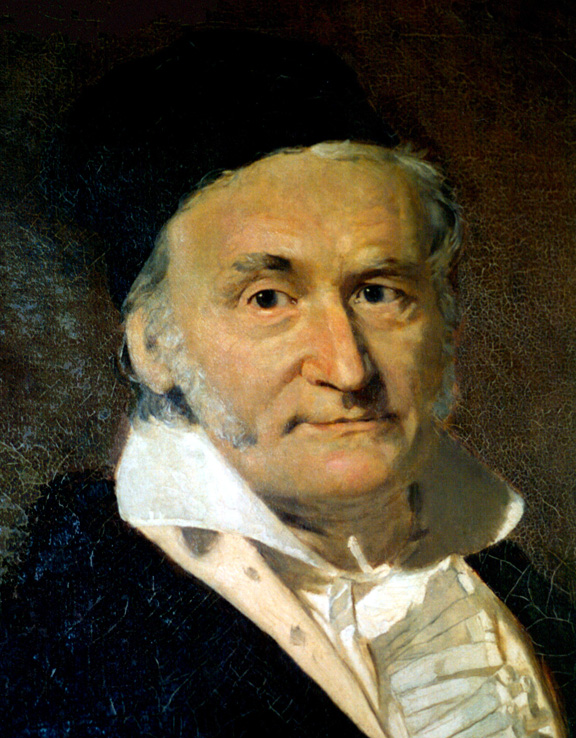

In [2]:
# image credit: http://en.wikipedia.org/wiki/Carl_Friedrich_Gauss#mediaviewer/File:Carl_Friedrich_Gauss.jpg
display(Image("images/Carl_Friedrich_Gauss.jpg", width=450))

In [3]:
HTML(u'<a href="http://commons.wikimedia.org/wiki/File:Carl_Friedrich_Gauss.jpg#/media/File:Carl_Friedrich_Gauss.jpg">"Carl Friedrich Gauss</a>" by Gottlieb BiermannA. Wittmann (photo) - Gauß-Gesellschaft Göttingen e.V. (Foto: A. Wittmann).. Licensed under Public Domain via <a href="//commons.wikimedia.org/wiki/">Wikimedia Commons</a>.')

In the last lecture we described a method for solving linear systems, but our description was somewhat informal.  Today we'll formally define _Gaussian Elimination_ , sometimes called _Gauss-Jordan Elimination_.  



Carl Gauss lived from 1777 to 1855, in Germany.  He is often called "the greatest mathematician since antiquity."

When Gauss was around 17 years old, he developed a method for working with inconsistent linear systems, called the method of _least squares_.  A few years later (at the advanced age of 24) he turned his attention to a particular problem in astronomy.  In 1801 the Sicilian astronomer Piazzi discovered a (dwarf) planet, which he named Ceres, in honor of the patron goddess of Sicily.  Piazzi took measurements of Ceres' position for 40 nights, but then lost track of it when it passed behind the sun.  Piazzi had only tracked Ceres through about 3 degrees of sky.  Gauss however then succeeded in calculating the orbit of Ceres, even though the task seemed hopeless on the basis of so few observations.  His computations were so accurate that the astronomer Olbers located Ceres again later the same year.

In the course of his computations Gauss had to solve systems of 17 linear equations.   Since Gauss at first refused to reveal the methods that led to this amazing accomplishment, some even accused him of sorcery.  Eight years later, in 1809, Gauss revealed his methods of orbit computation in his book _Theoria Motus Corporum Coelestium_.

Although Gauss invented this method (which Jordan then popularized), it was a reinvention.   As we mentioned in the previous lecture, linear systems were being solved by a similar method in China 2,000 years earlier.

Based on Bretscher, _Linear Algebra_ , pp 17-18, and the Wikipedia article on Gauss.

## Question Time!  Q3.1

## Echelon Forms

An _echelon_ is a term used in the military to decribe an arrangement of rows (of troops, or ships, etc) in which each successive row extends further than the row in front of it.

At the end of the last lecture, we had constructed this matrix:

$$
\left[\begin{array}{rrrr}
2&-3&2&1\\
0&1&-4&8\\
0&0&0&-37/2
\end{array}\right]
$$

A "leading entry" is the first nonzero element in a row.

__Definition:__ A matrix is in __echelon form__ (or row echelon form) if it has the following three properties:
1. All nonzero rows are above any rows of all zeros.
2. Each leading entry of a row is in a column to the right of the leading entry of the row above it.
3. All entries in a column below a leading entry are zeros.

For example:
$$
\left[\begin{array}{cccccccccc}
0&\blacksquare&*&*&*&*&*&*&*&*\\
0&0&0&\blacksquare&*&*&*&*&*&*\\
0&0&0&0&\blacksquare&*&*&*&*&*\\
0&0&0&0&0&\blacksquare&*&*&*&*\\
0&0&0&0&0&0&0&0&\blacksquare&*\\
0&0&0&0&0&0&0&0&0&0\\
\end{array}\right]
$$

In this diagram, the $\blacksquare$s are nonzero, and the $*$s can be any value.   

This definition is a refinement of the notion of a _triangular_ matrix (or system) that was introduced in the previous lecture.   

The goal of the __first__ step of Gaussian elimination is to convert the augmented matrix into echelon form.

__Definition:__ A matrix is in __reduced echelon form__ (or reduced row echelon form) if it is in echelon form, and furthermore:

1. The leading entry in each nonzero row is 1.
2. Each leading 1 is the only nonzero entry in its column.

For example:
$$
\left[\begin{array}{cccccccccc}
0&\fbox{1}&*&0&0&0&*&*&0&*\\
0&0&0&\fbox{1}&0&0&*&*&0&*\\
0&0&0&0&\fbox{1}&0&*&*&0&*\\
0&0&0&0&0&\fbox{1}&*&*&0&*\\
0&0&0&0&0&0&0&0&\fbox{1}&*\\
0&0&0&0&0&0&0&0&0&0\\
\end{array}
\right]
$$

The goal of the __second__ step of Gaussian elimination is to convert the matrix into reduced echelon form.

## Properties of Echelon Forms

Any matrix may be row reduced to an echelon form.  Echelon forms are _not_ unique; depending on the sequence of row operations, different echelon forms may be produced from a given matrix.

However, the reduced echelon form of a matrix _is_ unique.


__Theorem:__ <font color=maroon>Each matrix is equivalent to one and only one reduced echelon matrix.</font>

The positions of the leading entries of an echelon matrix and its reduced form are the same.  So, by the Theorem, the leading entries of _any_ echelon form of a given matrix are in the same positions.

__Definition:__ A pivot position in a matrix $A$ is the position of a leading 1 in the reduced echelon form of $A$.

## Gaussian Elimination: The Algorithm

As suggested by the last lecture, Gaussian Elimination has two stages.  Given an augmented matrix $A$ representing a linear system:

1. Convert $A$ to one of its echelon forms, say $U$.
2. Convert $U$ to $A$'s reduced row echelon form.

Each stage iterates over the rows of $A$, starting with the first row.

__Row Reduction Operations__

Before stating the algorithm, let's recall the set of operations that we can perform on rows without changing the solution set:

1. Multiply a row by a nonzero value.
2. Add a multiple of a row to another row.
3. Swap two rows.

__Gaussian Elimination, Stage 1__ (Elimination):

Input: matrix $A$.

We will use $i$ to denote the index of the current row.  To start, let $i = 1$.
Repeat the following steps:

1. Let $j$ be the position of the __leftmost nonzero value__ in row $i$ or any row below it.  If there is no such position, stop.
2. If the $j$th position in row $i$ is zero, swap this row with a row below it to make the $j$th position nonzero.  This creates a __pivot__ in position $i,j$.
3. Use row reduction operations to create zeros in all posititions below the pivot.  If any operation creates a row that is all zeros _except the last element,_ the system is inconsistent; stop.
4. Let $i = i + 1.$ If $i$ equals the number of rows in $A$, stop.
        
The output of this stage is an echelon form of $A$.

## Question Time! Q3.2

__Gaussian Elimination, Stage 2__ (Backsubstitution):

Input: an echelon form of $A$.

We start at the top again, so let $i = 1$.  Repeat the following steps:

1. If row $i$ is all zeros, or if $i$ exceeds the number of rows in $A$, stop.
2. If row $i$ has a nonzero pivot value, divide row $i$ by its pivot value.  This creates a 1 in the pivot position.
3. Use row reduction operations to create zeros in all positions above the pivot.  
4. Let $i = i+1$.

The output of this stage is the reduced echelon form of $A$.

Note: the book describes this stage as proceeding from the bottom of the matrix up; that procedure is equivalent to this one.

## Example

The Gaussian Elimination process we've described is essentially equivalent to the process described in the last lecture, so we won't do a lengthy example.  Let the input matrix $A$ be
$$\left[\begin{array}{rrrrrr}
0 & 3 & -6 & 6 & 4 & -5\\
3 & -7 & 8 & -5 & 8 & 9\\
3 & -9 & 12 & -9 & 6 & 15
\end{array}\right]$$



__Stage 1__

Start with the first row ($i = 1$).  The leftmost nonzero in row 1 and below is in position 1.  But since it's not in row 1, we need to swap.  We'll swap rows 1 and 3 (we could have swapped 1 and 2).

$$\left[\begin{array}{rrrrrr}
3 & -9 & 12 & -9 & 6 & 15\\
3 & -7 & 8 & -5 & 8 & 9\\
0 & 3 & -6 & 6 & 4 & -5
\end{array}\right]$$

The pivot is shown in a box. Use row reduction operations to create zeros below the pivot.  In this case, that means subtracting row 1 from row 2.

$$\left[\begin{array}{rrrrrr}
\fbox{3} & -9 & 12 & -9 & 6 & 15\\
0 & 2 & -4 & 4 & 2 & -6\\
0 & 3 & -6 & 6 & 4 & -5
\end{array}\right]$$

Now $i = 2$.  The pivot is boxed (no need to do any swaps).  Use row reduction to create zeros below the pivot.  To do so we subtract $3/2$ times row 2 from row 3.

$$\left[\begin{array}{rrrrrr}
3 & -9 & 12 & -9 & 6 & 15\\
0 & \fbox{2} & -4 & 4 & 2 & -6\\
0 & 0 & 0 & 0 & 1 & 4
\end{array}\right]$$

Now $i = 3$.  Since it is the last row, we are done with Stage 1.  The pivots are marked:

$$\left[\begin{array}{rrrrrr}
\fbox{3} & -9 & 12 & -9 & 6 & 15\\
0 & \fbox{2} & -4 & 4 & 2 & -6\\
0 & 0 & 0 & 0 & \fbox{1} & 4
\end{array}\right]$$

__Stage 2__

Starting again with the first row ($i = 1$).  Divide row 1 by its pivot. 

$$\left[\begin{array}{rrrrrr}
\fbox{1} & -3 & 4 & -3 & 2 & 5\\
0 & 2 & -4 & 4 & 2 & -6\\
0 & 0 & 0 & 0 & 1 & 4
\end{array}\right]$$

Moving to the next row ($i = 2$).  Divide row 2 by its pivot. 

$$\left[\begin{array}{rrrrrr}
1 & -3 & 4 & -3 & 2 & 5\\
0 & \fbox{1} & -2 & 2 & 1 & -3\\
0 & 0 & 0 & 0 & 1 & 4
\end{array}\right]$$

And use row reduction operations to create zeros in all elements above the pivot.  In this case, that means adding 3 times row 2 to row 1.

$$\left[\begin{array}{rrrrrr}
1 & 0 & -2 & 3 & 5 & -4\\
0 & \fbox{1} & -2 & 2 & 1 & -3\\
0 & 0 & 0 & 0 & 1 & 4
\end{array}\right]$$

Moving to the next row ($i = 3$).  The pivot is already 1.  So we subtract row 3 from row 2, and subtract 5 times row 3 from row 1.

$$\left[\begin{array}{rrrrrr}
1 & 0 & -2 & 3 & 0 & -24\\
0 & 1 & -2 & 2 & 0 & -7\\
0 & 0 & 0 & 0 & \fbox{1} & 4
\end{array}\right]$$

And we are done.

## How Many Operations does Gaussian Elimination Require?

Let's assess the computational cost required to solve a system of $n$ equations in $n$ unknowns.

First, we need to define our units.  We will count the number of additions, multiplications, divisions, or subtractions.  These are performed on floating point numbers, so they are called _flops_ (floating point operations).

For $n$ equations in $n$ unknowns, $A$ is an $n \times (n+1)$ matrix.  We can summarize stage 1 of GE as, in the worst case:

* For each row $i$ of $A$:
    * add a multiple of row $i$ to all rows below it
 

   
For row 1, this becomes $(n-1) \cdot 2(n+1)$ flops.  

That is, there are $n-1$ rows below row 1, each of those has $n+1$ elements, and each element requires one multiplication and one addition.  This is $2n^2-2$ flops for row 1.

When operating on row $i$, there are $k = n - i + 1$ unknowns and so there are $2k^2 - 2$ flops required to process the rows below row $i$.  So we can see that $k$ ranges from $n$ down to $1$.  

So, the number of operations required for the Elimination stage is:

$$
\begin{array}{rcl} \sum_{k=1}^n (2k^2 - 2) &=& \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\\
\end{array}
$$

$$
\begin{array}{rcl}
\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;&& 2 \left(\sum_{k=1}^n k^2 - \sum_{k=1}^n 1\right)\\
&=& 2 \left(\frac{n(n+1)(2n+1)}{6} - n\right)\\
&=& \frac{2}{3} n^3 + n^2 - \frac{5}{3} n
\end{array}
$$

The second step above is based on known formulas.

(Note -- this is a different calculation than is done in the book.)

When $n$ is large, this expression is dominated by (approximately equal to) $\frac{2}{3} n^3$. 

The second stage of GE only requires on the order of $n^2$ flops, so the whole algorithm is dominated by the $\frac{2}{3} n^3$ flops in the first stage.

So, we find that:
* The Elimination stage is $O(n^3)$.
* The Backsubstitution stage is $O(n^2)$.
    
Thus we say that __Gaussian Elimination is $O(n^3)$.__

## Question Time! Q3.3

## Using the Echelon Form

Returning to the fundamental questions about a linear system:
* <font color = maroon>consistency</font> and 
* <font color = maroon>uniqueness,</font>

we've discussed how the echelon form exposes consistency (by creating an equation $0 = k$ for some nonzero $k$).   

Now we can also discuss uniqueness.

Let's assume that the augmented matrix of a system has been transformed into the equivalent reduced echelon form:

$$
\left[\begin{array}{rrrr}
1&0&-5&1\\
0&1&1&4\\
0&0&0&0
\end{array}\right]
$$

This system is consistent.  Is the solution unique?

The associated system of equations is

$$
\begin{array}{rrrrr}
x_1 & & -5x_3 &=& 1\\
&x_2 & +x_3 &=& 4\\
&&0&=&0\\
\end{array}
$$

Variables $x_1$ and $x_2$ correspond to pivot columns.   They are called __basic__ variables.   The other variable $x_3$ is a __free__ variable.

Whenever a system is consistent, the solution set can be described explicitly by solving the reduced system of equations for the basic variables <font color = maroon>in terms of the free variables.</font>

This operation is possible because the reduced echelon form places each basic variable in one and only one equation. 

In the example, solve the first and second equations for $x_1$ and $x_2$. Ignore the third equation; it offers no restriction on the variables.

So the solution set is:

$$\begin{array}{rl}
x_1 &= 1 + 5x_3\\
x_2 &= 4 - x_3\\
x_3 &\mbox{is free}
\end{array}
$$

"$x_3$ is free" means you can choose any value for $x_3$.   

In other words, there are an inifinite set of solutions to this linear system. Each solution corresponds to a value of $x_3$.  

For instance, 
* when $x_3 = 0$, the solution is (1,4,0); 
* when $x_3 = 1,$ the solution is (6,3,1).


These are _parametric_ descriptions of solutions sets.  The free variables act as parameters.  

So: solving a system amounts to either:

* finding a parametric description of the solution set, or
* determining that the solution set is empty.

## Geometric Interpretation

$$
\left[\begin{array}{rrrr}
1&0&-5&1\\
0&1&1&4\\
0&0&0&0
\end{array}\right]
$$

In [4]:
fig = ut.three_d_figure('Figure 3.1', fig_desc = 'Solution set when one variable is free.',
                        xmin = -4, xmax = 4, ymin = 0, ymax = 8, zmin = -4, zmax = 4, 
                        qr = qr_setting)
eq1 = [1, 0, -5, 1]
eq2 = [0, 1, 1, 4]
fig.plotLinEqn(eq1, 'Brown')
fig.plotLinEqn(eq2, 'Green')
fig.plotIntersection(eq1, eq2, color='Blue')
fig.ax.set_title('Solution set when one variable is free.')
qrimg = fig.save('Fig03.1', qrviz = qrviz_setting)

<IPython.core.display.Javascript object>

In [5]:
if qrviz_setting == 'save':
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(qrimg, cmap='gray')
    ax.set_axis_off()

<IPython.core.display.Javascript object>

Since there is a row of zeros in the reduced echelon form matrix, there are only two equations (rather than three) that determine the solution set.   The equations

$$\begin{array}{rl}
x_1 &= 1 + 5x_3\\
x_2 &= 4 - x_3\\
x_3 &\mbox{is free}
\end{array}
$$
therefore describe a __line__ in 3-space.